In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357275 sha256=f74504a189b1976f590558d36cf2ab63bb7a635033756c6e2e2510178cdb59c1
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
min_rating = ratings['rating'].min()
max_rating = ratings['rating'].max()
print(min_rating, max_rating)

0.5 5.0


In [ ]:
from surprise import Reader, Dataset, SVD, KNNBasic
from surprise.model_selection import cross_validate

reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [ ]:
## cosine similarity for user based

sim_options = {'name': 'cosine', 'user_based': True}
knn_user_cosine = KNNBasic(sim_options=sim_options)

knn_user_cosine_res  = cross_validate(knn_user_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
knn_user_cosine_res

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9927  0.9982  1.0028  0.9946  0.9837  0.9944  0.0064  
MAE (testset)     0.7683  0.7713  0.7715  0.7668  0.7609  0.7678  0.0039  
Fit time          0.17    0.28    0.21    0.17    0.19    0.21    0.04    
Test time         1.66    2.49    1.33    1.47    1.33    1.66    0.44    


{'test_rmse': array([0.99272077, 0.99823711, 1.0028046 , 0.99456132, 0.98366124]),
 'test_mae': array([0.76825625, 0.77132297, 0.77146335, 0.76684591, 0.76091416]),
 'fit_time': (0.17279839515686035,
  0.27901291847229004,
  0.20712685585021973,
  0.1733262538909912,
  0.19497013092041016),
 'test_time': (1.6617546081542969,
  2.493678331375122,
  1.3313443660736084,
  1.4652268886566162,
  1.3297209739685059)}

In [ ]:
knn_user_cosine_rmse_mean = np.mean(knn_user_cosine_res['test_rmse'])
knn_user_cosine_mae_mean = np.mean(knn_user_cosine_res['test_mae'])

print("Knn user cosine rmse mean : " , knn_user_cosine_rmse_mean)
print("Knn user cosine mae mean  : " , knn_user_cosine_mae_mean)

Knn user cosine rmse mean :  0.9943970045736421
Knn user cosine mae mean  :  0.7677605309662776


In [ ]:
## cosine similarity for item based

sim_options = {'name': 'cosine', 'user_based': False}
knn_item_cosine = KNNBasic(sim_options=sim_options)

knn_item_cosine_res  = cross_validate(knn_item_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
knn_item_cosine_res

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0062  0.9984  1.0024  0.9828  0.9889  0.9957  0.0087  
MAE (testset)     0.7838  0.7749  0.7816  0.7671  0.7661  0.7747  0.0072  
Fit time          6.97    6.76    6.79    6.79    6.78    6.82    0.08    
Test time         6.13    6.37    6.37    6.51    6.39    6.35    0.12    


{'test_rmse': array([1.00624405, 0.99839433, 1.00236407, 0.98280827, 0.98892982]),
 'test_mae': array([0.78377305, 0.77490191, 0.78164773, 0.76714488, 0.76612539]),
 'fit_time': (6.969949960708618,
  6.758750677108765,
  6.789348602294922,
  6.7875096797943115,
  6.780838966369629),
 'test_time': (6.133547782897949,
  6.367324352264404,
  6.365672826766968,
  6.506926774978638,
  6.390348434448242)}

In [ ]:
knn_item_cosine_rmse_mean = np.mean(knn_item_cosine_res['test_rmse'])
knn_item_cosine_mae_mean = np.mean(knn_item_cosine_res['test_mae'])

print("Knn item cosine rmse mean : " , knn_item_cosine_rmse_mean)
print("Knn item cosine mae mean  : " , knn_item_cosine_mae_mean)

Knn item cosine rmse mean :  0.9957481081208929
Knn item cosine mae mean  :  0.7747185908437537


In [ ]:
## Probabilistic Matrix Factorization

pmf_res = cross_validate(SVD(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
pmf_res

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8983  0.8957  0.9036  0.8979  0.8951  0.8981  0.0030  
MAE (testset)     0.6901  0.6915  0.6950  0.6897  0.6914  0.6915  0.0019  
Fit time          2.16    1.94    1.42    1.49    1.47    1.70    0.30    
Test time         0.18    0.11    0.11    0.12    0.12    0.13    0.03    


{'test_rmse': array([0.89832236, 0.89565562, 0.90360168, 0.89792328, 0.8950929 ]),
 'test_mae': array([0.69009995, 0.69153132, 0.69498422, 0.68970077, 0.6914164 ]),
 'fit_time': (2.1572530269622803,
  1.9425795078277588,
  1.4242181777954102,
  1.4938733577728271,
  1.4654815196990967),
 'test_time': (0.17764520645141602,
  0.10835933685302734,
  0.10863137245178223,
  0.11796855926513672,
  0.12483382225036621)}

In [ ]:
pmf_res_rmse_mean = np.mean(pmf_res['test_rmse'])
pmf_res_mae_mean = np.mean(pmf_res['test_mae'])

print("PMF rmse mean : " , pmf_res_rmse_mean)
print("PMF mae mean  : " , pmf_res_mae_mean)

PMF rmse mean :  0.8981191680920585
PMF mae mean  :  0.6915465320809371


In [ ]:
## msd similarity for user based

sim_options = {'name': 'msd', 'user_based': True}

knn_user_msd = KNNBasic(sim_options=sim_options)

knn_user_msd_res  = cross_validate(knn_user_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
knn_user_msd_res

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9764  0.9755  0.9641  0.9707  0.9646  0.9703  0.0052  
MAE (testset)     0.7505  0.7502  0.7417  0.7445  0.7406  0.7455  0.0042  
Fit time          0.12    0.13    0.14    0.18    0.13    0.14    0.02    
Test time         1.36    1.35    1.99    2.46    1.38    1.71    0.45    


{'test_rmse': array([0.9764376 , 0.97554266, 0.96407964, 0.97074218, 0.96462979]),
 'test_mae': array([0.75053956, 0.75019093, 0.74173247, 0.74445225, 0.74064873]),
 'fit_time': (0.12408256530761719,
  0.13049674034118652,
  0.13627409934997559,
  0.1774308681488037,
  0.13439178466796875),
 'test_time': (1.3573589324951172,
  1.3463990688323975,
  1.989734172821045,
  2.460336446762085,
  1.3794786930084229)}

In [ ]:
## msd similarity for item based

sim_options = {'name': 'msd', 'user_based': False}

knn_item_msd = KNNBasic(sim_options=sim_options)

knn_item_msd_res  = cross_validate(knn_item_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
knn_item_msd_res

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9315  0.9349  0.9290  0.9318  0.9459  0.9346  0.0060  
MAE (testset)     0.7188  0.7209  0.7180  0.7197  0.7271  0.7209  0.0033  
Fit time          4.12    3.71    3.74    3.70    4.08    3.87    0.19    
Test time         7.60    8.31    8.24    7.60    6.60    7.67    0.61    


{'test_rmse': array([0.93146856, 0.93492232, 0.92899149, 0.93179647, 0.94593091]),
 'test_mae': array([0.71879223, 0.7208636 , 0.71798774, 0.71972595, 0.7271168 ]),
 'fit_time': (4.123215198516846,
  3.705300807952881,
  3.738940477371216,
  3.6977968215942383,
  4.075262784957886),
 'test_time': (7.604947328567505,
  8.309360027313232,
  8.239065408706665,
  7.5998311042785645,
  6.604368686676025)}

In [ ]:
## pearson similarity for user based

sim_options = {'name': 'pearson', 'user_based': True}

knn_user_pearson = KNNBasic(sim_options=sim_options)

knn_user_pearson_res  = cross_validate(knn_user_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
knn_user_pearson_res

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9983  0.9951  0.9982  0.9970  1.0031  0.9983  0.0026  
MAE (testset)     0.7723  0.7696  0.7735  0.7717  0.7757  0.7725  0.0020  
Fit time          0.21    0.21    0.21    0.21    0.33    0.23    0.05    
Test time         1.51    1.33    1.50    1.49    2.59    1.69    0.46    


{'test_rmse': array([0.9983137 , 0.99507494, 0.99824964, 0.99702598, 1.00306941]),
 'test_mae': array([0.77228521, 0.76957138, 0.77350918, 0.77168056, 0.77567606]),
 'fit_time': (0.20543551445007324,
  0.20911169052124023,
  0.21377158164978027,
  0.2095355987548828,
  0.33173274993896484),
 'test_time': (1.5113496780395508,
  1.3269598484039307,
  1.5005791187286377,
  1.4940896034240723,
  2.592031717300415)}

In [ ]:
## pearson similarity for item based

sim_options = {'name': 'pearson', 'user' : False }

knn_item_pearson = KNNBasic(sim_options=sim_options)

knn_item_pearson_res  = cross_validate(knn_item_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
knn_item_pearson_res

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9942  0.9933  0.9986  1.0136  0.9951  0.9990  0.0075  
MAE (testset)     0.7701  0.7685  0.7727  0.7828  0.7703  0.7729  0.0051  
Fit time          0.22    0.21    0.23    0.33    0.26    0.25    0.04    
Test time         1.32    1.39    2.32    2.09    1.51    1.73    0.40    


{'test_rmse': array([0.99421679, 0.99328272, 0.99862152, 1.01362135, 0.99512098]),
 'test_mae': array([0.77011201, 0.76853352, 0.77270393, 0.78282336, 0.77033296]),
 'fit_time': (0.22371578216552734,
  0.21075749397277832,
  0.23010849952697754,
  0.3326609134674072,
  0.2556772232055664),
 'test_time': (1.3238885402679443,
  1.3942146301269531,
  2.3201234340667725,
  2.0914971828460693,
  1.5088739395141602)}

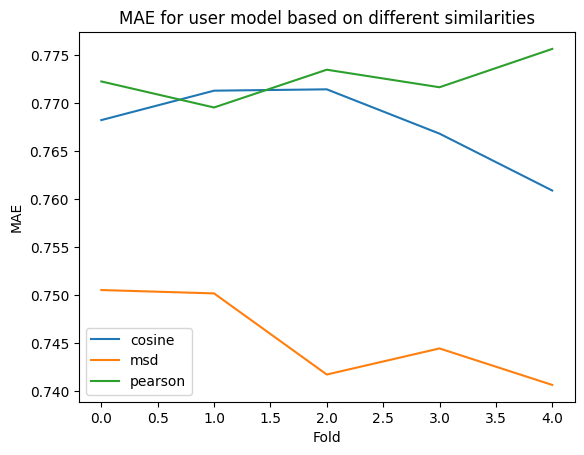

In [ ]:
## plot for user based on different similarities for MAE

plt.plot(knn_user_cosine_res['test_mae'])
plt.plot(knn_user_msd_res['test_mae'])
plt.plot(knn_user_pearson_res['test_mae'])
plt.legend(['cosine', 'msd', 'pearson'])
plt.title('MAE for user model based on different similarities')

plt.xlabel('Fold')
plt.ylabel('MAE')
plt.show()



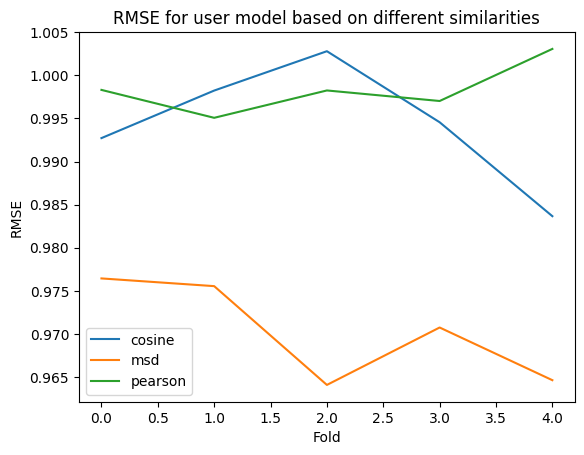

In [ ]:
## plot for user based on different similarities for RMSE

plt.plot(knn_user_cosine_res['test_rmse'])
plt.plot(knn_user_msd_res['test_rmse'])
plt.plot(knn_user_pearson_res['test_rmse'])
plt.legend(['cosine', 'msd', 'pearson'])
plt.title('RMSE for user model based on different similarities')

plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.show()

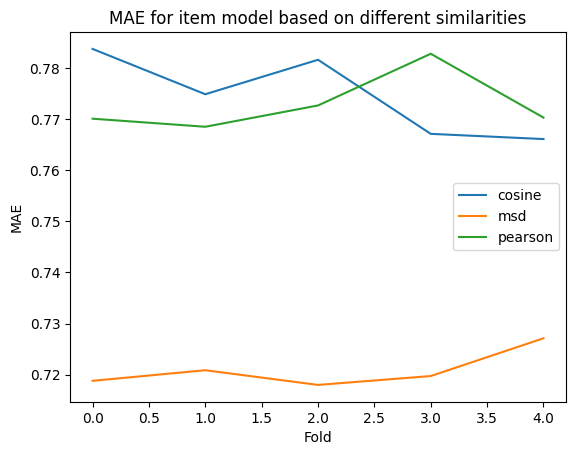

In [ ]:
## plot for item based on different similarities for MAE

plt.plot(knn_item_cosine_res['test_mae'])
plt.plot(knn_item_msd_res['test_mae'])
plt.plot(knn_item_pearson_res['test_mae'])
plt.legend(['cosine', 'msd', 'pearson'])
plt.title('MAE for item model based on different similarities')

plt.xlabel('Fold')
plt.ylabel('MAE')
plt.show()

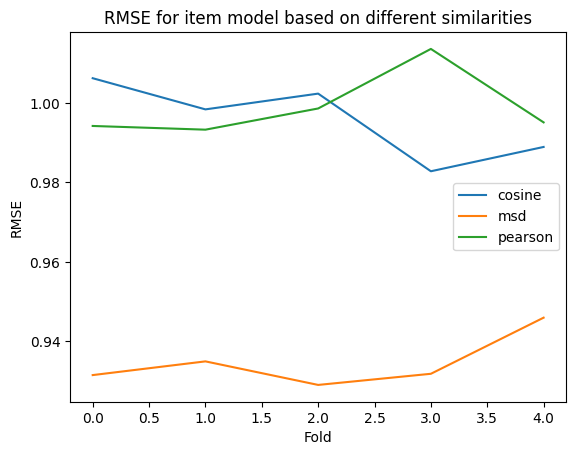

In [ ]:
## plot for item based on different similarities for RMSE

plt.plot(knn_item_cosine_res['test_rmse'])
plt.plot(knn_item_msd_res['test_rmse'])
plt.plot(knn_item_pearson_res['test_rmse'])
plt.legend(['cosine', 'msd', 'pearson'])
plt.title('RMSE for item model based on different similarities')

plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.show()

In [ ]:
## using MSD simialrity to find the best K for item based, since it performs well for all

sim_options = {'name': 'msd', 'user_based': False}


item_k_msd_res = {}

start_k = 5
max_k = len(ratings.movieId.unique())
prev_rmse = 1000000000

for k1 in range(start_k, max_k, 3):
  knn_item_msd = KNNBasic(sim_options=sim_options, k=k1)
  res = cross_validate(knn_item_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
  cur_rmse = np.mean(res['test_rmse'])
  cur_mae = np.mean(res['test_mae'])
  item_k_msd_res[k1] = ("mean_rmse" , cur_rmse, "mean_mae", cur_mae)
  print(k1, cur_rmse, cur_mae)
  if (cur_rmse > prev_rmse):
    break
  prev_rmse = cur_rmse




Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0025  1.0158  1.0276  1.0243  1.0201  1.0181  0.0088  
MAE (testset)     0.7741  0.7862  0.7933  0.7910  0.7875  0.7864  0.0067  
Fit time          4.56    4.87    3.86    3.86    3.98    4.23    0.41    
Test time         5.42    5.72    8.67    7.26    7.16    6.85    1.17    
5 1.0180669922271048 0.7864127998926661
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the m

In [ ]:
## using MSD simialrity to find the best K for user based, since it performs well for all

sim_options = {'name': 'msd', 'user_based': True}


user_k_msd_res = {}

start_k = 5
max_k = len(ratings.userId.unique())
prev_rmse = 1000000000

for k1 in range(start_k, max_k, 3):
  knn_user = KNNBasic(sim_options=sim_options, k=k1)
  res = cross_validate(knn_user, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
  cur_rmse = np.mean(res['test_rmse'])
  cur_mae = np.mean(res['test_mae'])
  user_k_msd_res[k1] = ("mean_rmse" , cur_rmse, "mean_mae", cur_mae)
  print(k1, cur_rmse, cur_mae)
  if (cur_rmse > prev_rmse):
    break
  prev_rmse = cur_rmse

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9837  0.9945  0.9950  0.9868  0.9828  0.9886  0.0052  
MAE (testset)     0.7527  0.7614  0.7599  0.7549  0.7521  0.7562  0.0038  
Fit time          0.20    0.22    0.30    0.17    0.18    0.21    0.05    
Test time         2.08    1.68    1.05    1.05    1.09    1.39    0.42    
5 0.9885713888412271 0.7561784983689266
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the m

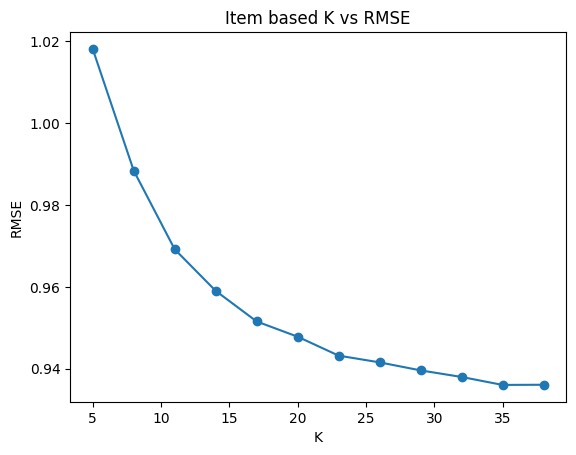

{5: ('mean_rmse', 1.0180669922271048, 'mean_mae', 0.7864127998926661), 8: ('mean_rmse', 0.9883817435494944, 'mean_mae', 0.7645877023122001), 11: ('mean_rmse', 0.9691628139933017, 'mean_mae', 0.7497621095969775), 14: ('mean_rmse', 0.9590193324752739, 'mean_mae', 0.7420649580788156), 17: ('mean_rmse', 0.9515466693119894, 'mean_mae', 0.735651695597442), 20: ('mean_rmse', 0.9478209223921373, 'mean_mae', 0.7326190365054962), 23: ('mean_rmse', 0.9432038078727947, 'mean_mae', 0.7282336467840345), 26: ('mean_rmse', 0.9415576870160833, 'mean_mae', 0.7270355138443458), 29: ('mean_rmse', 0.9396008033803115, 'mean_mae', 0.7252500480927541), 32: ('mean_rmse', 0.9379932786264902, 'mean_mae', 0.724453558694893), 35: ('mean_rmse', 0.9360541987460049, 'mean_mae', 0.7221221895260406), 38: ('mean_rmse', 0.9360945413367551, 'mean_mae', 0.722468864037112)}


In [ ]:
## plotting for item based

plt.plot(item_k_msd_res.keys(), [x[1] for x in item_k_msd_res.values()], marker='o')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('Item based K vs RMSE')
plt.show()

print(item_k_msd_res)

##least value at 35

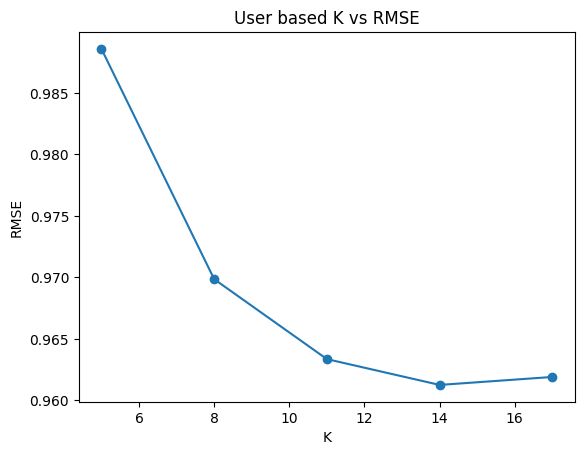

{5: ('mean_rmse', 0.9885713888412271, 'mean_mae', 0.7561784983689266), 8: ('mean_rmse', 0.9698584779324925, 'mean_mae', 0.7418722980304523), 11: ('mean_rmse', 0.963362020095952, 'mean_mae', 0.7366038097359626), 14: ('mean_rmse', 0.9612651538150002, 'mean_mae', 0.7361146948817704), 17: ('mean_rmse', 0.9619120759265835, 'mean_mae', 0.7365689617250111)}


In [ ]:
## plotting for user based

plt.plot(user_k_msd_res.keys(), [x[1] for x in user_k_msd_res.values()], marker='o')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('User based K vs RMSE')
plt.show()

print(user_k_msd_res)